In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df=pd.read_csv("Customer_Support_Tickets_Realistic.csv")
df

,Ticket ID,Ticket Description,Category
0,T001,"Dear customer service, I'm facing an issue rel...",Technical Issue
1,T002,"Dear customer service, I'm facing an issue rel...",Account Issue
2,T003,"Hey, I'm confused about a slow performance pro...",Technical Issue
3,T004,"Hello, I'd like to understand the app freezing...",Technical Issue
4,T005,"Hey, I'm not sure how to handle a delay in pay...",Billing Issue
...,...,...,...
495,T496,"Greetings, I'm confused about sync not working...",Technical Issue
496,T497,"Hi, I need some guidance regarding the dashboa...",Technical Issue
497,T498,"Hey there, Could you help me with how to conta...",General Inquiry
498,T499,"Hi team, Can someone explain differences betwe...",General Inquiry


In [4]:
df["Category"].unique()

array(['Technical Issue', 'Account Issue', 'Billing Issue',
       'General Inquiry', 'Product Inquiry'], dtype=object)

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df["Preprocessed TD"]=df["Ticket Description"].apply(preprocess_text)
df

,Ticket ID,Ticket Description,Category,Preprocessed TD
0,T001,"Dear customer service, I'm facing an issue rel...",Technical Issue,dear customer service im facing issue related ...
1,T002,"Dear customer service, I'm facing an issue rel...",Account Issue,dear customer service im facing issue related ...
2,T003,"Hey, I'm confused about a slow performance pro...",Technical Issue,hey im confused slow performance problem updat...
3,T004,"Hello, I'd like to understand the app freezing...",Technical Issue,hello id like understand app freezing login th...
4,T005,"Hey, I'm not sure how to handle a delay in pay...",Billing Issue,hey im sure handle delay payment confirmation ...
...,...,...,...,...
495,T496,"Greetings, I'm confused about sync not working...",Technical Issue,greeting im confused sync working across devic...
496,T497,"Hi, I need some guidance regarding the dashboa...",Technical Issue,hi need guidance regarding dashboard loading p...
497,T498,"Hey there, Could you help me with how to conta...",General Inquiry,hey could help contact customer care directly ...
498,T499,"Hi team, Can someone explain differences betwe...",General Inquiry,hi team someone explain difference basic premi...


In [8]:
lbl=LabelEncoder()
df["Category"]=lbl.fit_transform(df["Category"])
df

,Ticket ID,Ticket Description,Category,Preprocessed TD
0,T001,"Dear customer service, I'm facing an issue rel...",4,dear customer service im facing issue related ...
1,T002,"Dear customer service, I'm facing an issue rel...",0,dear customer service im facing issue related ...
2,T003,"Hey, I'm confused about a slow performance pro...",4,hey im confused slow performance problem updat...
3,T004,"Hello, I'd like to understand the app freezing...",4,hello id like understand app freezing login th...
4,T005,"Hey, I'm not sure how to handle a delay in pay...",1,hey im sure handle delay payment confirmation ...
...,...,...,...,...
495,T496,"Greetings, I'm confused about sync not working...",4,greeting im confused sync working across devic...
496,T497,"Hi, I need some guidance regarding the dashboa...",4,hi need guidance regarding dashboard loading p...
497,T498,"Hey there, Could you help me with how to conta...",2,hey could help contact customer care directly ...
498,T499,"Hi team, Can someone explain differences betwe...",2,hi team someone explain difference basic premi...


In [9]:
tfidf=TfidfVectorizer(max_features=5000)

In [10]:
x=tfidf.fit_transform(df["Preprocessed TD"]).toarray()
y=df["Category"]
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.28075572, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42519293, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
X_tfidf_df = pd.DataFrame(x, columns=tfidf.get_feature_names_out())
X_tfidf_df

,access,accessory,account,across,adding,advance,advise,afternoon,alert,android,...,understand,upcoming,update,updating,upgrade,version,whether,work,working,would
0,0.000000,0.0,0.000000,0.000000,0.0,0.265218,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,0.0,0.280756,0.000000,0.0,0.285600,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.346316,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.314795,0.00000,0.0,0.0,0.0,...,0.320445,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000000,0.0,0.000000,0.408075,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.408075,0.0
496,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.28744,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
497,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
498,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [12]:
print(f"Processed data shape: {x.shape}")
print(f"Number of unique categories: {len(lbl.classes_)}")

Processed data shape: (500, 188)
Number of unique categories: 5


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
mnb=MultinomialNB()
mnb

MultinomialNB()

In [15]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [16]:
mapping_mnb = {0: 'Account Issue', 1: 'Billing Issue', 2: 'General Inquiry',3:'Product Inquiry',4:'Technical Issue'}
prediction_mnb=mnb.predict(x_test)
pred_mnb=[mapping_mnb[value] for value in prediction_mnb]

In [17]:
prediction_mnb = pd.DataFrame(prediction_mnb, columns=["Predicted - Numerical"])
categorical_mnb=pd.DataFrame(pred_mnb,columns=["Predicted - Categorical"])

In [18]:
predict_df=pd.concat([prediction_mnb,categorical_mnb],axis=1)
predict_df

,Predicted - Numerical,Predicted - Categorical
0,0,Account Issue
1,1,Billing Issue
2,4,Technical Issue
3,2,General Inquiry
4,1,Billing Issue
...,...,...
95,4,Technical Issue
96,4,Technical Issue
97,2,General Inquiry
98,0,Account Issue


In [19]:
#manual - multinomial Naive Bayes
def predict_category_m(text):
    text = preprocess_text(text)  # Apply same preprocessing
    text_tfidf = tfidf.transform([text]).toarray()  # Convert to TF-IDF vector
    prediction = mnb.predict(text_tfidf)  # Predict
    return mapping_mnb[prediction[0]]  # Convert back to label

mnb_input=input("Comment: ")
m_pred = predict_category_m(mnb_input)
print(f"Category: {m_pred}") 


Comment:  i can't reset my password


Category: Account Issue


In [20]:
cm_mnb=confusion_matrix(y_test,prediction_mnb)
cr_mnb=classification_report(y_test,prediction_mnb,target_names=lbl.classes_)
print(cm_mnb)
print("-"*50)
print(cr_mnb)

[[25  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 24]]
--------------------------------------------------
                 precision    recall  f1-score   support

  Account Issue       1.00      1.00      1.00        25
  Billing Issue       1.00      1.00      1.00        10
General Inquiry       1.00      1.00      1.00        19
Product Inquiry       1.00      1.00      1.00        22
Technical Issue       1.00      1.00      1.00        24

       accuracy                           1.00       100
      macro avg       1.00      1.00      1.00       100
   weighted avg       1.00      1.00      1.00       100



In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
mapping_rf = {0: 'Account Issue', 1: 'Billing Issue', 2: 'General Inquiry',3:'Product Inquiry',4:'Technical Issue'}
prediction_rf=model.predict(x_test)
pred_rf=[mapping_rf[value] for value in prediction_rf]



In [23]:
prediction_rf = pd.DataFrame(prediction_rf, columns=["Predicted - Numerical"])
categorical_rf=pd.DataFrame(pred_rf,columns=["Predicted - Categorical"])
predict_rf=pd.concat([prediction_rf,categorical_rf],axis=1)
predict_rf

,Predicted - Numerical,Predicted - Categorical
0,0,Account Issue
1,1,Billing Issue
2,4,Technical Issue
3,2,General Inquiry
4,1,Billing Issue
...,...,...
95,4,Technical Issue
96,4,Technical Issue
97,2,General Inquiry
98,0,Account Issue


In [24]:
"How can I upgrade my current subscription?"

'How can I upgrade my current subscription?'

In [33]:
#manual - random forest
def predict_category_r(text):
    text = preprocess_text(text)  # Apply same preprocessing
    text_tfidf = tfidf.transform([text]).toarray()  # Convert to TF-IDF vector
    prediction = model.predict(text_tfidf)  # Predict
    return mapping_rf[prediction[0]]  # Convert back to label

ran_input=input("Comment: ")
r_pred = predict_category_r(ran_input)
print(f"Category: {r_pred}") 

Comment:  error while accessing product features


Category: Technical Issue


In [29]:
cm_rf=confusion_matrix(y_test,prediction_rf)
cr_rf=classification_report(y_test,prediction_rf,target_names=lbl.classes_)
print(cm_rf)
print("-"*50)
print(cr_rf)

[[25  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 24]]
--------------------------------------------------
                 precision    recall  f1-score   support

  Account Issue       1.00      1.00      1.00        25
  Billing Issue       1.00      1.00      1.00        10
General Inquiry       1.00      1.00      1.00        19
Product Inquiry       1.00      1.00      1.00        22
Technical Issue       1.00      1.00      1.00        24

       accuracy                           1.00       100
      macro avg       1.00      1.00      1.00       100
   weighted avg       1.00      1.00      1.00       100



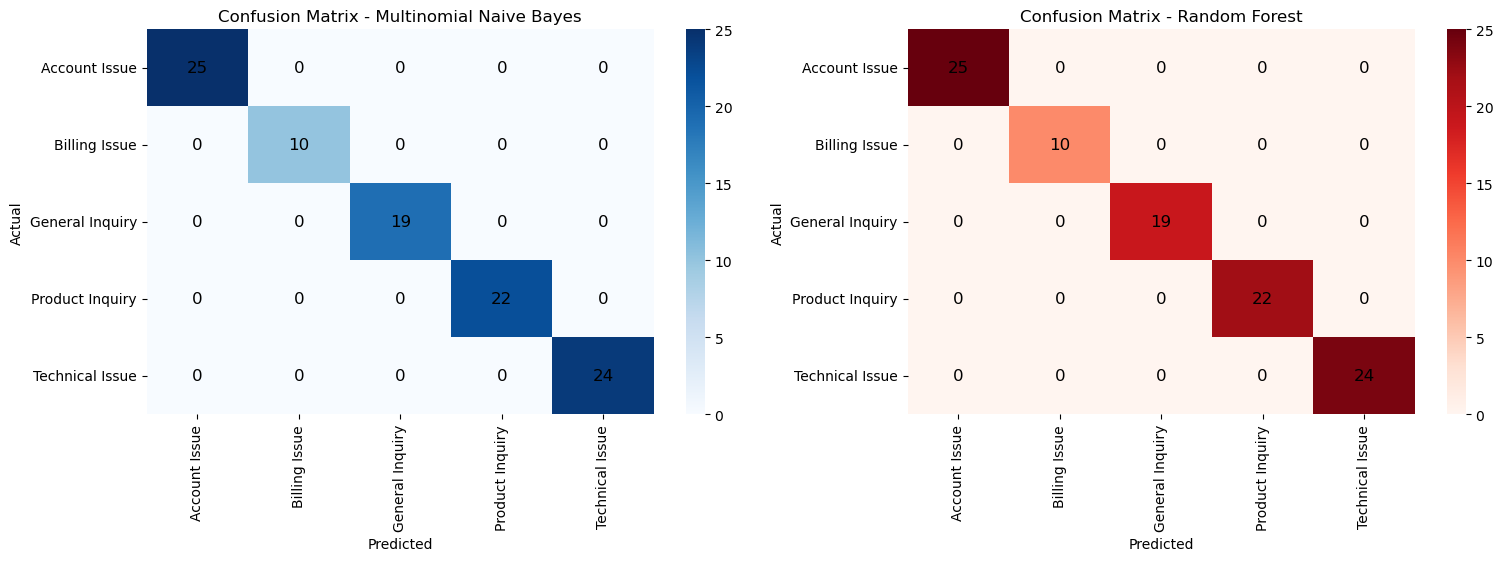

In [30]:
# Confusion Matrix Heatmap for MNB
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm_mnb, annot=False, fmt='d', cmap='Blues', xticklabels=lbl.classes_, yticklabels=lbl.classes_)
for i in range(cm_mnb.shape[0]):
    for j in range(cm_mnb.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_mnb[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix Heatmap for Random Forest
plt.subplot(1,2,2)
ax=sns.heatmap(cm_rf, annot=False, fmt='d', cmap='Reds', xticklabels=lbl.classes_, yticklabels=lbl.classes_)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_rf[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()